In [283]:
import cv2
from matplotlib import pyplot as plt

In [284]:
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()
    
def plt_show0(img):
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    plt.imshow(img)
    plt.show()
    
def plt_show(img):
    plt.imshow(img,cmap="gray")
    plt.show()

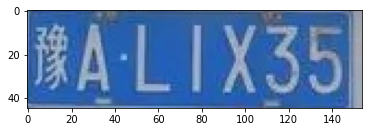

In [292]:
img = cv2.imread("./car_license/license1.jpg")
plt_show0(img)

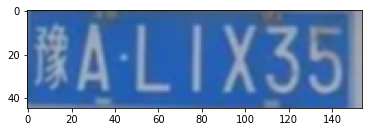

In [293]:
# 高斯降噪
image = cv2.GaussianBlur(img,(3,3),0)
plt_show0(image)

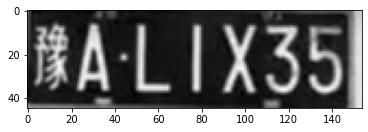

In [294]:
# 灰度处理
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt_show(gray_image)

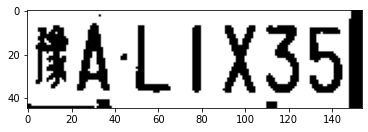

In [295]:
# 自适应阈值处理
ret,image = cv2.threshold(gray_image,0,255,cv2.THRESH_OTSU|cv2.THRESH_BINARY_INV)
plt_show(image)

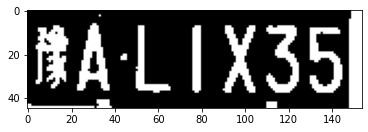

In [296]:
# 统计二值图中黑白点个数，便于绿色牌照处理，让车牌号码始终保持为白色
area_white = 0
area_blace = 0
height,weight = image.shape
for i in range(height):
    for j in range(weight):
        if(image[i,j]==255):
            area_white+=1
        else:
            area_blace+=1
if area_white>area_blace:
    ret,image = cv2.threshold(image,0,255,cv2.THRESH_OTSU|cv2.THRESH_BINARY_INV)
    plt_show(image)           

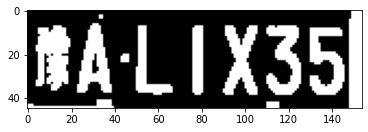

In [301]:
# 将完整字体合并为一个图层，便于每个字符的提取
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
# image2 = cv2.erode(image,kernel)
image = cv2.dilate(image,kernel)
plt_show(image)
# 膨胀 腐蚀
# kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,5))
# image3 = cv2.dilate(image2,kernel2)
# image3 = cv2.erode(image3,kernel2)
# image3 = cv2.morphologyEx(image2,cv2.MORPH_CLOSE,kernel2,iterations=2)
# plt_show(image3)

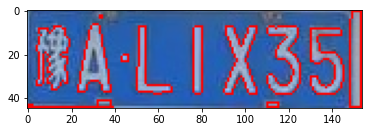

In [302]:
# 轮廓检测
contours,hierarchy = cv2.findContours(image,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
# 绘制轮廓
temp_img = img.copy()
cv2.drawContours(temp_img,contours,-1,(0,0,255),1)
plt_show0(temp_img)

[[0, 41, 40, 4], [4, 7, 16, 30], [23, 6, 16, 32], [33, 2, 2, 2], [43, 20, 4, 4], [50, 7, 17, 32], [76, 7, 5, 32], [90, 7, 16, 32], [110, 42, 6, 3], [110, 7, 16, 32], [130, 8, 16, 31], [148, 0, 6, 45]]


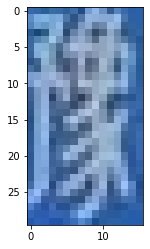

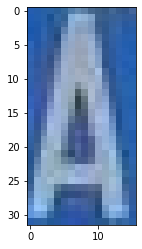

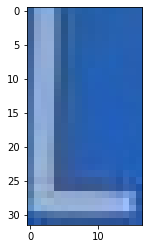

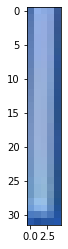

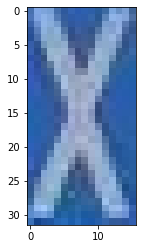

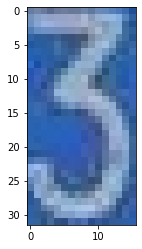

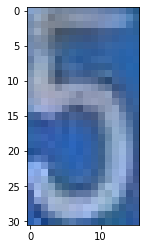

In [326]:
# 筛选各字符的位置轮廓
words = []
for item in contours:
    word = []
    rect = cv2.boundingRect(item)
    x = rect[0]
    y = rect[1]
    weight = rect[2]
    height = rect[3]
    word.append(x)
    word.append(y)
    word.append(weight)
    word.append(height)
    words.append(word)
words = sorted(words,key=lambda s:s[0],reverse=False)
print(words)
i = 0
for word in words:
    if (word[3]>(word[2]*1.5) and word[3]<word[2]*6.5):
        i = i+1
        image = img[word[1]:word[1]+word[3],word[0]:word[0]+word[2]]
        plt_show0(image)
        cv2.imwrite("./car_letter/letter_"+str(i)+".jpg",image)